# **Q 6.1**
Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [0]:
#importing required libraries

import pandas as pd
import sklearn.cluster
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re
import glob
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot,show

In [0]:

def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    dataframe.set_index( dataframe.Date, inplace=True )
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)

def getCap( filename ):
    return re.sub(r'^.*/(\w+_Cap)/.*$', '\\1', filename)

In [0]:
filenames = glob.glob('/content/drive/My Drive/internship/stocks/**/*.csv')

portfolio_caps_seen = { getCap(filename): 0 for filename in filenames }
portfolio = DataFrame()
for filename in filenames:
    if  portfolio_caps_seen[ getCap(filename) ] < 10:
        portfolio_caps_seen[ getCap(filename) ] += 1

        portfolio[ getName(filename) ] = read_csv(filename).drop(read_csv(filename).Series[read_csv(filename)['Series'] != 'EQ'].index)['Close Price']

In [4]:
portfolio.shape

(493, 30)

In [5]:
portfolio.isnull().sum()

ASIANPAINT    0
BAJFINANCE    0
BPCL          1
INFRATEL      0
CIPLA         2
HINDALCO      1
HINDUNILVR    1
ITC           2
MARUTI        2
TITAN         1
GODREJIND     0
IDBI          0
IGL           3
JINDALSTEL    0
MRPL          0
PNB           0
SUNTV         0
TATAPOWER     1
VOLTAS        0
ADANIPOWER    0
VIPIND        0
RAYMOND       0
PVR           1
NCC           3
LUXIND        0
ITDC          0
FORTIS        1
LALPATHLAB    1
CENTURYPLY    0
ASHOKA        0
dtype: int64

In [0]:
portfolio.dropna(inplace=True,axis=0)

In [7]:
portfolio.shape

(479, 30)

# **Q 6.2**

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [8]:
import numpy as np
from math import sqrt
working_days_per_year    = 252
stock= pd.DataFrame()
stock['returns']    = portfolio.pct_change().mean() * working_days_per_year
stock['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
stock

,returns,volatility
ASIANPAINT,0.101045,0.212639
BAJFINANCE,0.467681,0.323236
BPCL,-0.268700,0.445340
INFRATEL,-0.128429,0.309764
CIPLA,0.011897,0.257310
HINDALCO,0.039439,0.335844
HINDUNILVR,0.308301,0.194620
ITC,0.045418,0.220373
MARUTI,0.003677,0.227300
TITAN,0.507165,0.330353


# **Q 6.3**
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

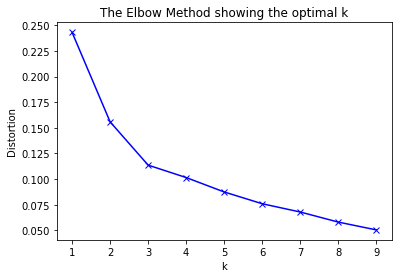

In [9]:


data = np.asarray([np.asarray(stock['returns']),np.asarray(stock['volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

The above figure  gives us an indication that 5 clusters are a good number here as we don't want the n_clusters to be too big and as the error rate decrease slows down after 5.

optimal cluster=5

Text(0, 0.5, 'inertia - % change')

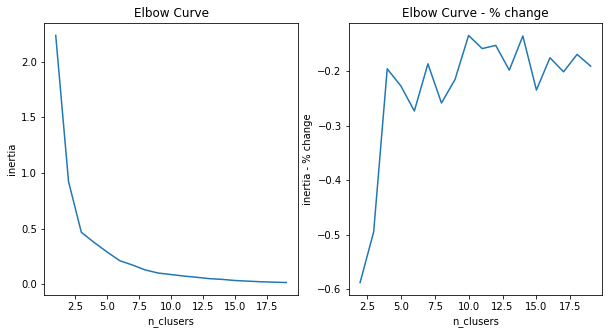

In [10]:
import sklearn.cluster

import pandas as pd
import numpy as np
import sklearn.cluster
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re
import glob
from matplotlib import cm
elbow_curve = [ None ] + [ sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(stock).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot( elbow_curve )
axes[0].set_title('Elbow Curve')    
axes[0].set_xlabel('n_clusers')
axes[0].set_ylabel('inertia')

axes[1].plot( Series(elbow_curve).pct_change() )
axes[1].set_title('Elbow Curve - % change')    
axes[1].set_xlabel('n_clusers')
axes[1].set_ylabel('inertia - % change')

# **Q 6.4**
Prepare a separate Data frame to show which stocks belong to the same cluster

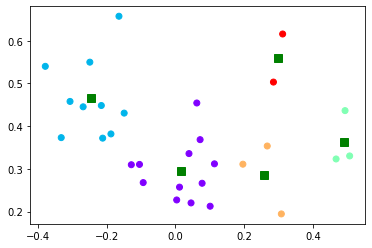

In [11]:
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

**Finding outliers**



In [12]:
print(stock['returns'].idxmax())

TITAN


In [0]:
Company = pd.DataFrame(stock.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df_cluster = pd.concat([Company, cluster_labels],axis = 1)

In [14]:
df_cluster

,0,0
0,ASIANPAINT,0
1,BAJFINANCE,2
2,BPCL,1
3,INFRATEL,0
4,CIPLA,0
5,HINDALCO,0
6,HINDUNILVR,3
7,ITC,0
8,MARUTI,0
9,TITAN,2


**plotting to show which stock belongs to same cluster**

In [0]:
kmeans_model=sklearn.cluster.KMeans(n_clusters=5,random_state=0).fit(stock)
stock['Pred']=kmeans_model.predict(stock[['returns','volatility']])

In [0]:
cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

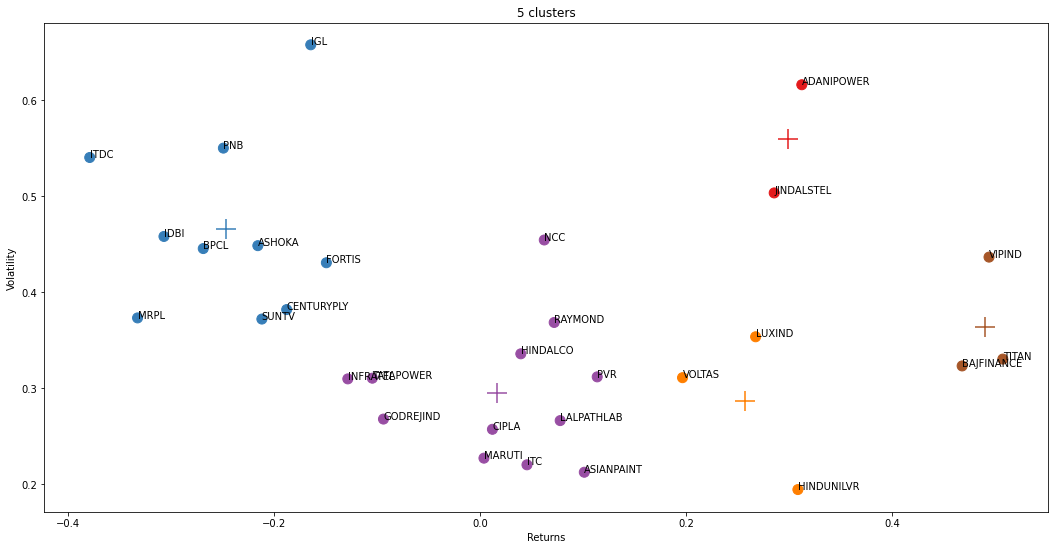

In [20]:
plt.figure(figsize=(18,9))

prediction=stock['Pred']
plt.scatter(stock.returns,stock.volatility,c=get_color(prediction),s=100,alpha=1)
plt.title('5 clusters')
plt.xlabel('Returns')
plt.ylabel('Volatility')


for i,coords in enumerate(kmeans_model.cluster_centers_):
  plt.scatter(coords[0],coords[1],s=400,marker='+',c=[get_color(i)])

for i,text in enumerate(stock.index):
  plt.annotate(text,(stock.returns[i],stock.volatility[i]))
